In [7]:
# -*- coding: utf-8 -*-
"""
With this one, it reads several files(stop_words.txt,self_defined_words.txt,train_1_update.txt) 
for the purpose of word embedding using Jieba and Word2Vec.

Jieba segamentation---->Word2Vec embbeding which re-trains the pre-trained wv with our tokens
(By the way, all the labeled data are garanteed to be vectorized)
--->The model of words' vectors are created for the classification later on.'

"""
def preprocess_articles():
    import jieba
    import gensim 
    import numpy as np
    r=open('./pre_processed_data/stop_words.txt',encoding='utf-8')
    stop_words=r.read()
    r.close()
    
    jieba.load_userdict('./pre_processed_data/self_defined_words.txt') 
    
    r=open('./material/train_1_update.txt',encoding='utf-8')
    text=r.read()
    r.close()
    
    article_lists=text.split('\n--------------------\n')
    del(article_lists[-1])
    processed_ariticles= list(map(lambda x:[x[0],'\narticle_id\t'+x[1]],[article.split('\narticle_id\t') for article in article_lists]))
    
    for article in processed_ariticles:
        article[0]=article[0].replace("\n醫師：",'醫師：').replace("\n民眾：",'民眾：').replace("\n家屬：",'家屬：').replace("\n個管師：",'個管師：').replace("\n護理師：",'護理師：')
    
    token_list=[]
    for number,art in enumerate(processed_ariticles):
        token_list.append([[t for t in jieba.tokenize(art[0]) if t[0] not in stop_words]])
        label_of_current_article=[s.split() for s in art[1].split('\n')]
        del(label_of_current_article[0:2])
        del(label_of_current_article[-1])
        token_list[number].append(label_of_current_article)
    token_list=np.array(token_list,dtype=object)
    np.save('./pre_processed_data/token_list.npy',token_list)
    
    train_list=[[w[0] for articles in token_list[:,0] for w in articles]]
    
    model=gensim.models.Word2Vec.load('./pre_trained_wv/zh.bin')
    model.vocabulary.min_count=1
    model.build_vocab(train_list, update=True)
    model.train(train_list,epochs=50,total_examples=model.corpus_count)
    model.wv.save_word2vec_format('./pre_trained_wv/wv.txt')
    print(f'There are now {len(model.wv.vocab)} words in the model.')
    

    return token_list
if __name__=='__main__':
    a=preprocess_articles()
print(a[0])


There are now 54808 words in the model.
[list([('回去', 4, 6), ('還好', 6, 8), ('虛虛', 17, 19), ('真的', 28, 30), ('好險', 34, 36), ('好險', 36, 38), ('坦白', 39, 41), ('講我剛', 41, 44), ('回去', 44, 46), ('晚上', 49, 51), ('盜', 54, 55), ('汗', 55, 56), ('盜汗', 60, 62), ('前天', 69, 71), ('很多', 72, 74), ('前天', 75, 77), ('沒盜', 79, 81), ('一覺', 84, 86), ('天明', 87, 89), ('一覺', 95, 97), ('天明', 98, 100), ('我給', 102, 104), ('電腦', 106, 108), ('斷層', 108, 110), ('病毒', 121, 123), ('報告', 123, 125), ('知道', 126, 128), ('病毒', 135, 137), ('幫', 151, 152), ('你驗', 152, 154), ('不少', 155, 157), ('自體', 160, 162), ('免疫', 162, 164), ('相信', 175, 177), ('之前', 178, 180), ('都驗過', 180, 183), ('工作', 198, 200), ('壓力', 200, 202), ('很大', 202, 204), ('潰瘍', 207, 209), ('真的', 215, 217), ('自體', 222, 224), ('免疫', 224, 226), ('還好', 227, 229), ('negative', 233, 241), ('negative', 245, 253), ('皰疹', 262, 264), ('皰疹', 268, 270), ('病毒', 270, 272), ('抗體', 273, 275), ('negative', 277, 285), ('Q', 297, 298), ('熱陰性', 298, 301), ('第一次', 304, 307), ('檢查', 3

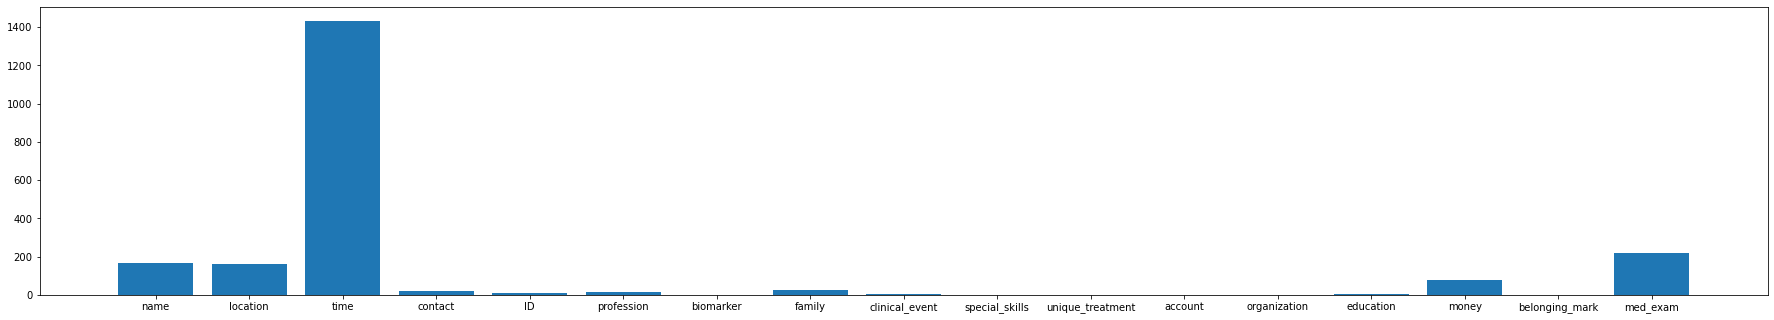

In [8]:
word_vec_for_classes={'name':0,'location':0,'time':0,'contact':0,'ID':0,'profession':0,'biomarker':0,
               'family':0,'clinical_event':0,'special_skills':0,'unique_treatment':0,'account':0,
               'organization':0,'education':0,'money':0,'belonging_mark':0,'med_exam':0}
for w in a[:,1]:
    for i in w:
        word_vec_for_classes[i[4]]+=1
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,4,1])
langs = word_vec_for_classes.keys()
students = word_vec_for_classes.values()
ax.bar(langs,students)
plt.show()